In [1]:
import pandas as pd
import geopandas as gp
import qgrid
from palettable.tableau import Tableau_20

In [2]:
%matplotlib inline
from matplotlib import pylab as plt

# READING DATA

In [114]:
offices = pd.read_csv('../data/results/reg005_office_results.csv')
atms    = pd.read_csv('../data/results/reg005_atm_results.csv') 

results = pd.concat([atms, offices])

In [115]:
results.head(2)

,f_pois,s_pois,reg_score,priority,office_id,score
0,508|837|943|31|4693|4717|4501|4904|4869|4900|4...,508|837|943|4693|4717|4501|4904|4869|4900|4830...,316.1,1,2060,3319.1
1,82|78|84|787|6722|74|743|857|926|86|974|6700|6...,78|787|6722|743|857|926|6699|6723|7342|6698|67...,135.1,2,2267,3198.1


In [116]:
results.loc[pd.notnull(results['f_pois']), 'f_pois']  =  results.loc[pd.notnull(results['f_pois']), 'f_pois'].apply(lambda x: [int(y) for y in x.split('|')])
results.loc[pd.notnull(results['s_pois']), 's_pois']  =  results.loc[pd.notnull(results['s_pois']), 's_pois'].apply(lambda x: [int(y) for y in x.split('|')])

In [117]:
results.loc[ pd.isnull(results[['f_pois', 's_pois']]).any(1), ['f_pois', 's_pois']] = None


In [118]:
def tol_joiner(x, y):

    if x is None or isinstance(x, str):
        x = []
    if y is None or isinstance(y, str):
        y = []
    
    return x + y

In [119]:
results['pois'] = results.apply(lambda x: tol_joiner(x['f_pois'], x['s_pois']),1)

In [120]:
results.drop(['s_pois', 'f_pois'], axis=1, inplace=1)

In [121]:
banks = gp.read_file('../data/real/banks.geojson')[['name', 'address', 'shop_intersect','type', 'office_id']]

In [122]:
banks = banks.merge(results, on='office_id', how='left')
banks['score'].fillna(0, inplace=1)

In [123]:
banks.head(3)

,name,address,shop_intersect,type,office_id,reg_score,priority,score,pois
0,ВСП 7954/1110,"г. Зеленоград, 315",,Отделение,2378,100.55,343.0,505.55,"[10191, 10190, 10192, 10193, 670, 10189, 10188..."
1,ВСП 7954/1559,"г. Зеленоград, 1561Б",,Отделение,2387,64.35,446.0,364.35,"[10264, 10265, 10266, 10267, 10268, 10269, 102..."
2,Доп.офис №9038/01150,"г.Москва, ул.Смольная, д.7",,Отделение,230,181.25,179.0,876.25,"[554, 555, 1247, 1264, 1266, 1244, 1265, 1245,..."


In [124]:
len(results[pd.notnull(results['priority'])])

2365

In [125]:
banks[pd.isnull(banks['priority'])]

,name,address,shop_intersect,type,office_id,reg_score,priority,score,pois
98,Банкомат 184296,"г. ЛАПШИНКА,8",,Банкомат,894,NaN,NaN,0.0,NaN
636,Доп.офис №9038/01,"г.Москва, с. Красная Пахра 10",,Отделение,653,NaN,NaN,0.0,NaN
821,Банкомат 693903,г. Ж/К ДУБРОВКАУлица Сосновая 6,,Банкомат,861,NaN,NaN,0.0,NaN
842,Банкомат 650014,"г. Зеленоград, Площадь Крюковская 1",,Банкомат,884,NaN,NaN,0.0,NaN
849,Банкомат 650261,"г. КАРТМАЗОВО,7",,Банкомат,891,NaN,NaN,0.0,NaN
850,Банкомат 248717,"г. КАРТМАЗОВО,7",,Банкомат,892,NaN,NaN,0.0,NaN
1249,Банкомат 10095083,"г. Москва,Километр Новорижское Шоссе 22-й",,Банкомат,1302,NaN,NaN,0.0,NaN
1250,Банкомат 10095082,"г. Москва,Километр Новорижское Шоссе 22-й",,Банкомат,1303,NaN,NaN,0.0,NaN
1251,Банкомат 10095084,"г. Москва,Километр Новорижское Шоссе 22-й",,Банкомат,1304,NaN,NaN,0.0,NaN
1313,Банкомат 252219,"г. Москва,Шоссе Иваньковское 3",,Банкомат,1368,NaN,NaN,0.0,NaN


In [126]:
results[pd.notnull(results['score'])].sort_values('score', ascending=False).head(10)

,reg_score,priority,office_id,score,pois
0,316.10,1,2060,3319.10,"[508, 837, 943, 31, 4693, 4717, 4501, 4904, 48..."
1,135.10,2,2267,3198.10,"[82, 78, 84, 787, 6722, 74, 743, 857, 926, 86,..."
2,110.65,3,2086,3105.65,"[784, 879, 907, 924, 753, 1861, 1866, 1875, 11..."
0,573.45,1,848,3011.45,"[82, 787, 6722, 743, 857, 78, 74, 974, 6723, 7..."
1,302.35,2,809,2855.35,"[31, 508, 837, 943, 4693, 4874, 4902, 4717, 48..."
3,207.15,4,2030,2823.15,"[650, 962, 887, 892, 651, 1255, 8475, 8473, 84..."
2,94.60,3,654,2822.60,"[8340, 322, 321, 700, 828, 834, 893, 779, 950,..."
3,1242.15,4,399,2744.15,"[106, 108, 855, 947, 6036, 8318, 8312, 8319, 8..."
4,261.20,5,2161,2709.20,"[613, 723, 933, 396, 616, 618, 746, 1633, 623,..."
5,266.55,6,2085,2706.55,"[973, 975, 7184, 7223, 7213, 7232, 7236, 7241,..."


### SCORE/USE Histogram

In [127]:
banks['type'].value_counts()

Банкомат                      1480
Отделение                      744
Отделение самообслуживания     167
Name: type, dtype: int64

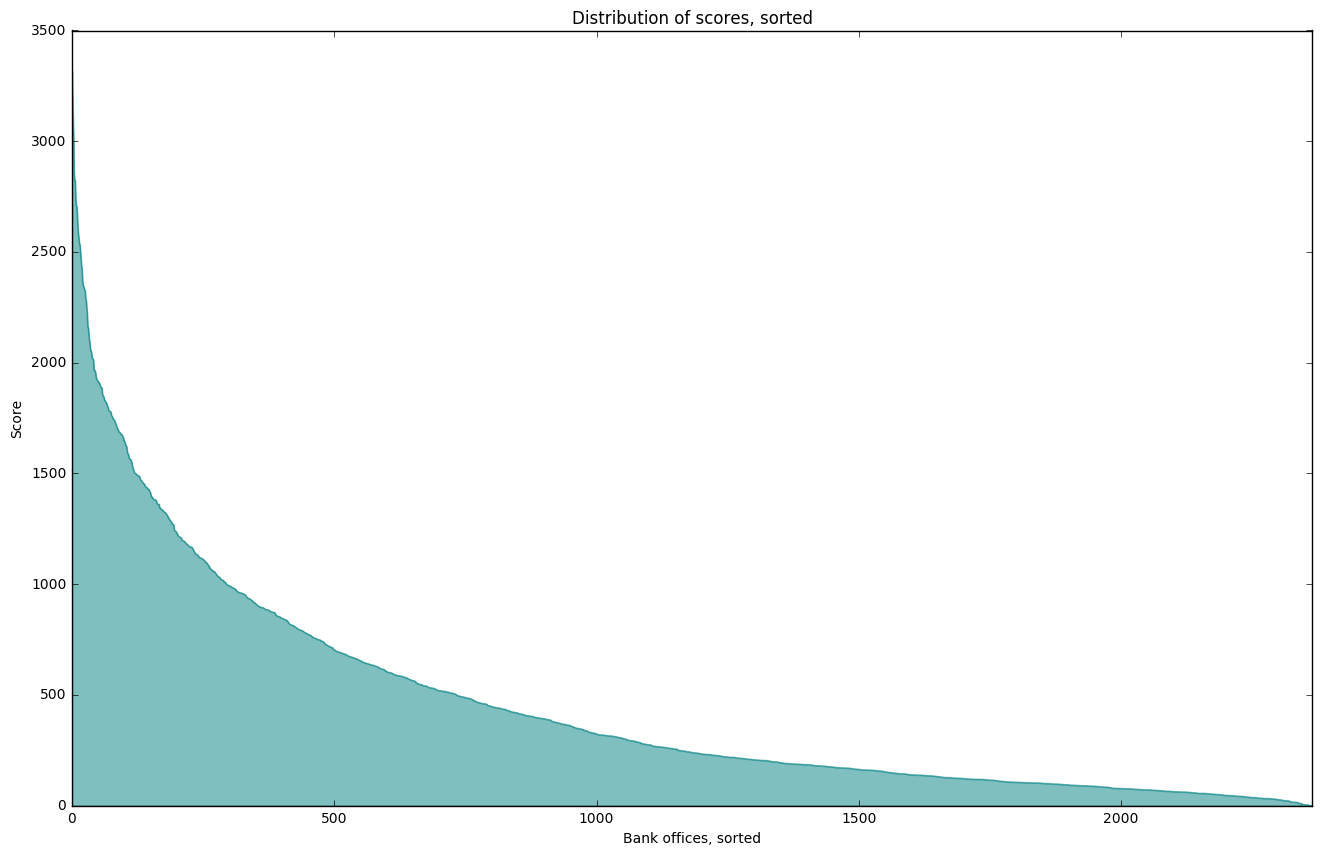

In [128]:
results['score'].sort_values(ascending=False).reset_index(drop=True).plot(kind='area', stacked=False, color='teal',figsize=(16,10))
plt.xlabel('Bank offices, sorted')
plt.ylabel('Score')
plt.title('Distribution of scores, sorted')

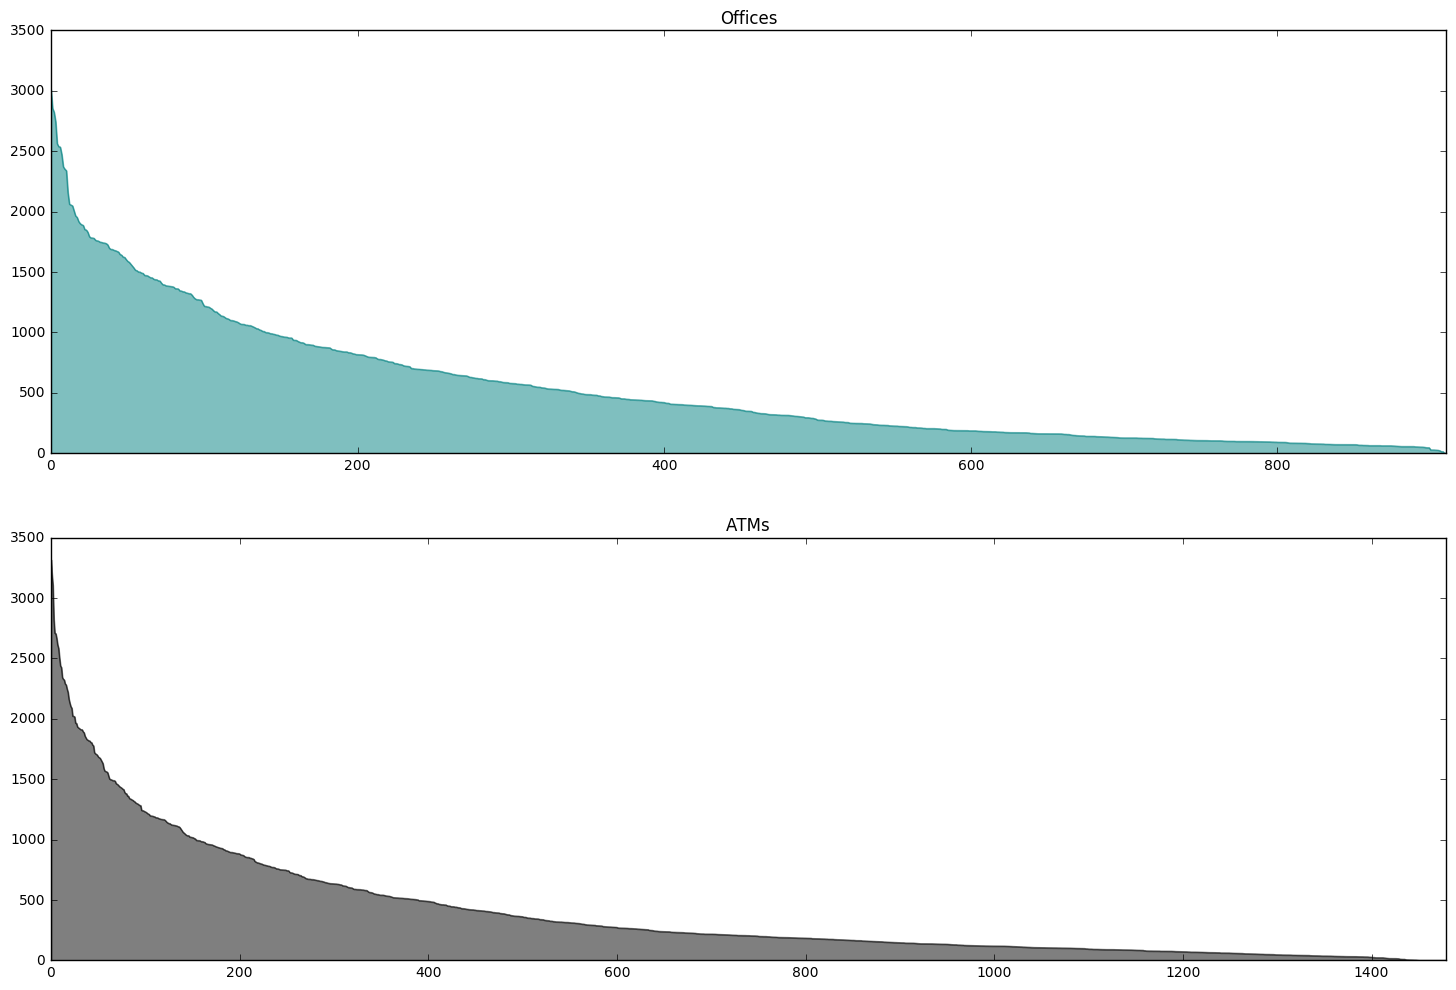

In [129]:
fig, axes = plt.subplots(2,1, figsize=(18,12))

banks.loc[banks['type']!=u'Банкомат', 'score'].sort_values(ascending=False).reset_index(drop=True).plot(kind='area', stacked=False, color='teal',ax=axes[0])
banks.loc[banks['type']==u'Банкомат', 'score'].sort_values(ascending=False).reset_index(drop=True).plot(kind='area', stacked=False, color='black',ax=axes[1])
axes[0].set_title('Offices')
axes[1].set_title('ATMs')

166 first Offices will cover more than 50% of potential demand
213 first ATMs will cover more than 50% of potential demand


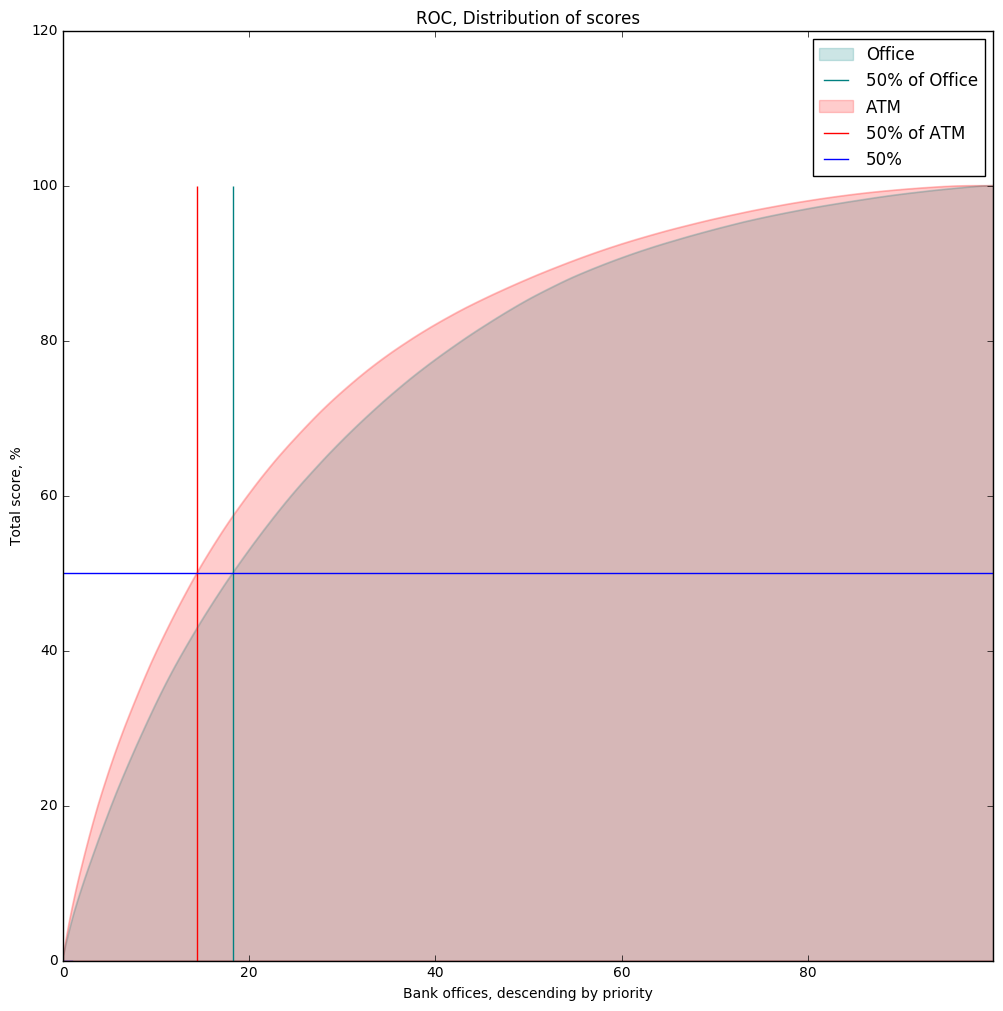

In [130]:
fig, ax = plt.subplots(figsize=(12,12))

office_score = banks.loc[banks['type']!=u'Банкомат', 'score'].fillna(0)
atm_score = banks.loc[banks['type']==u'Банкомат', 'score'].fillna(0)

colors = ('teal', 'red')
for color, el, name in zip(colors, (office_score, atm_score), ('Office', 'ATM')):
    el = 100*el.sort_values(ascending=False).reset_index(drop=True).cumsum()/el.sum()
    el.index = 100.*el.index/len(el)
    el.plot(kind='area', stacked=False ,ax=ax, color=color, alpha=.2, label=name)
    
    ix = el[el>=50].index[0] # first object above 50% of total
    plt.vlines(ix, 0, 100, colors=color, label='50% of {}'.format(name))
    print("{} first {}s will cover more than 50% of potential demand".format(int(ix*len(el)/100),name))
    


plt.hlines(50, 0, 100, colors='b', label='50%')

plt.xlabel('Bank offices, descending by priority')
plt.plot([[0,100],[0,2300]])
plt.ylabel('Total score, %')
plt.title('ROC, Distribution of scores')
plt.legend()

## Distribution of scores

In [131]:
pois = gp.read_file('../data/real/poi.geojson', encoding="utf-8")

In [132]:
pois['score'] = pois['score'].astype(float)

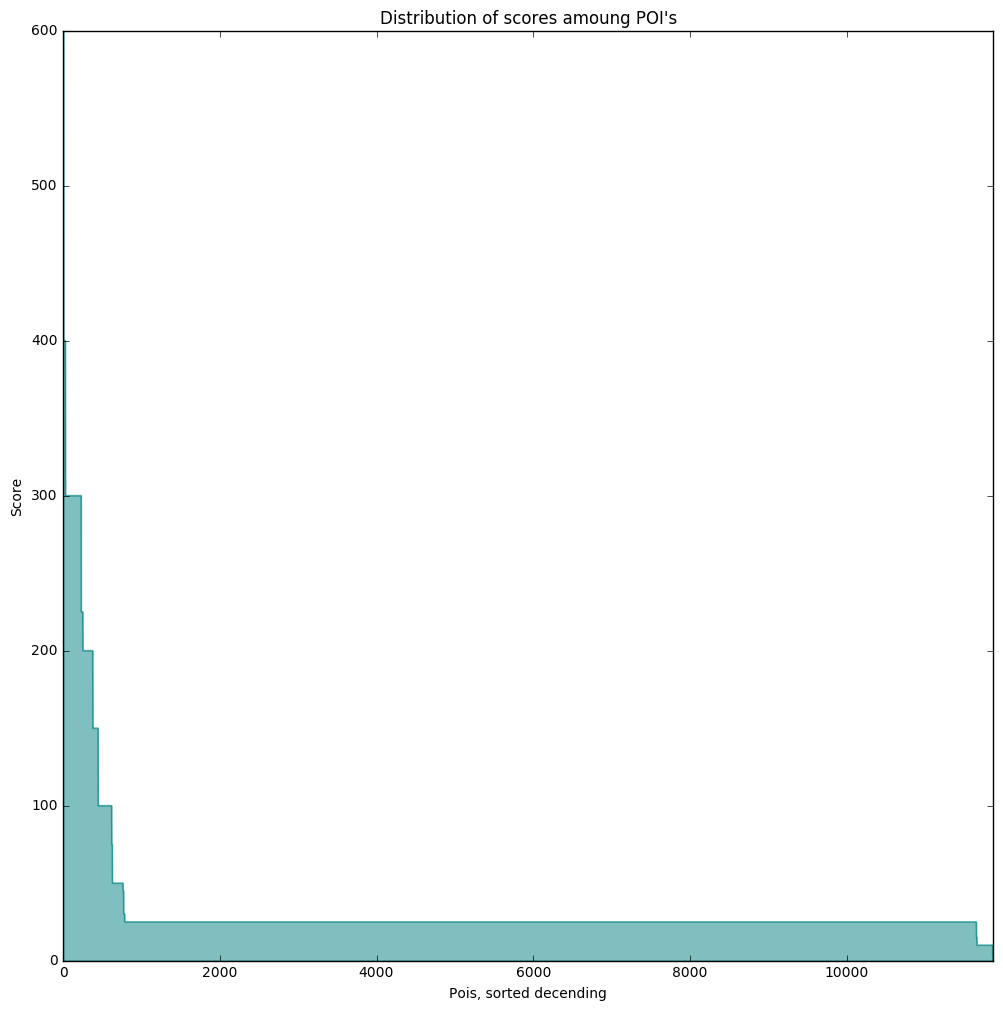

In [133]:
pois['score'].sort_values(ascending=False).reset_index(drop=True).plot(kind='area', stacked=False, color='teal',figsize=(12,12))
plt.title("Distribution of scores amoung POI's")
plt.xlabel('Pois, sorted decending')
plt.ylabel('Score')

In [134]:
pois[['score','group']].groupby('group').agg(['sum', 'count','mean'])

score         \
                                                          sum  count   
group                                                                  
TC                                                   58500.00    195   
transport                                           294250.00  10958   
Больницы                                              1665.00    147   
ВОИ                                                   1450.00     26   
Дома престарелых                                       400.00     16   
Культурные мероприятия для инвалидов                     0.25      1   
НКО                                                   5601.50    107   
Образовательные учреждения с квотами для инвалидов   13200.00    124   
Работодатели инвалидов                                5925.00     29   
Ресурсные центры                                      4275.00     32   
Специальные объекты культуры для инвалидов            2000.00     27   
Спорт                                                 2010.75    101   
Центры реабилитации                                  10100.00     44   
Центры социального обслуживания                      12400.00     63   

                                                                
                                                          mean  
group                                                           
TC                                                  300.000000  
transport                                            26.852528  
Больницы                                             11.326531  
ВОИ                                                  55.769231  
Дома престарелых                                     25.000000  
Культурные мероприятия для инвалидов                  0.250000  
НКО                                                  52.350467  
Образовательные учреждения с квотами для инвалидов  106.451613  
Работодатели инвалидов                              204.310345  
Ресурсные центры                                    133.593750  
Специальные объекты культуры для инвалидов           74.074074  
Спорт                                                19.908416  
Центры реабилитации                                 229.545455  
Центры социального обслуживания                     196.825397

In [135]:
print pois['score'].sum()
print pois['score'].count()
print pois['score'].mean()

411777.5
11870
34.6906065712


In [136]:
pois[['score','subgroup']].groupby('subgroup').agg(['sum', 'count','mean'])

score         \
                                                         sum  count   
subgroup                                                              
mcc                                                   4650.0     31   
stops                                               270200.0  10808   
subway                                               10000.0     25   
train                                                 9400.0     94   
АНО                                                    100.0      3   
БФ                                                     177.5      5   
Библиотеки                                             300.0      8   
ВОГ                                                   2407.5     51   
ВОГ, главное отделение                                 300.0      1   
ВОИ                                                   1250.0     25   
ВОИ, Главное отделение                                 500.0      2   
ВОС                                                   1150.0     23   
ВОС, Главное отделение                                 300.0      1   
ВУЗЫ                                                   555.0     14   
Городские больницы                                     225.0      3   
Детские площадки                                        50.0      1   
Дневные стационары                                    1440.0    144   
Дома престарелых                                       400.0     16   
Кино                                                   100.0      2   
Клуб                                                   895.0     16   
Колледжи                                               500.0     10   
Мастер-классы                                           75.0      1   
Мастерские                                            5925.0     29   
НКО                                                    900.0     20   
Общежитие ВУЗа                                          75.0      1   
Объединение                                            100.0      1   
Одежда и обувь для детей с ограничением по здор...      45.0      3   
Пункты выдачи и пункты проката технических сред...    4200.0     28   
РОО                                                    256.5     11   
Развивающие центры                                    7100.0     35   
Разовые мероприятия                                      1.0      4   
Ресурсные центры                                        30.0      1   
Спорт                                                 1620.0     88   
Танцы                                                   50.0      1   
Театр                                                  400.0      4   
Торговый центр                                       58500.0    195   
Училище                                                600.0      6   
Центр ремесел                                          200.0      1   
Центры социального обслуживания                      12400.0     63   
Центры социальной реабилитации                        3000.0      9   
Школы общеобразовательные для детей с ограничен...    5800.0     58   
Школы-интернаты                                       5600.0     28   

                                                                
                                                          mean  
subgroup                                                        
mcc                                                 150.000000  
stops                                                25.000000  
subway                                              400.000000  
train                                               100.000000  
АНО                                                  33.333333  
БФ                                                   35.500000  
Библиотеки                                           37.500000  
ВОГ                                                  47.205882  
ВОГ, главное отделение                              300.000000  
ВОИ                                                  50.000000  
ВОИ, Главное о

## Contribution to first 20

In [137]:
z = reduce(lambda x,y: x+y, results.sort_values('score', ascending=False).head(20)['pois'].tolist())

In [138]:
pois20 = pois[pois.pid.isin(z)]
pois20.shape

(0, 11)

In [139]:
pp = banks.sort_values('score', ascending=False).head(20)
pp = pp[['office_id', 'pois']].set_index('office_id').to_dict()['pois']

In [140]:
r = {}
for key in pp:
    for x in pp[key]:
        r[int(x)] = key
r = pd.Series(r)         

In [141]:
#pois.set_index('pid', inplace=1)
pois['office_id'] = r

In [142]:
pois.head(2)

,address,disability,geometry,group,id,importance,name,pid,pop,score,subgroup,office_id
0,"109451, Москва, Перервинский бульвар, дом 5, к...",general,POINT (37.765169 55.662807),Больницы,75,1.0,ГБУЗ Онкологический диспансер № 5 ДЗМ,76,10,10.0,Дневные стационары,NaN
1,"109387, г. Москва, ул. Тихая, д. 23",deaf,POINT (37.741669 55.686033),НКО,101,2.0,МГО ВОГ Местное отделение,102,25,50.0,ВОГ,NaN


In [143]:
contribution = pois[pd.notnull(pois['office_id'])].groupby(['office_id', 'group']).agg({'score':sum}).unstack().fillna(0)
contribution.index = contribution.index.astype(int)

In [144]:
contribution['reg'] = results[['office_id', 'reg_score']].set_index('office_id')

In [145]:
c_summ = contribution.sum(1)

In [146]:
c_summ.sort_values(ascending=False)

office_id
1107    1817.95
399     1767.15
654     1729.60
2267    1610.10
2085    1491.55
2060    1426.10
1512    1356.35
1938    1353.45
1128    1325.75
2030    1267.15
715     1200.10
2075    1178.85
2161    1171.20
2086    1050.65
778      931.75
705      857.40
2379     838.30
848      798.45
875      157.65
dtype: float64

In [147]:
contribution['total'] = contribution.sum(1)

In [148]:
contribution.shape

(19, 15)

In [149]:
contribution.columns =  contribution.columns.get_level_values(1).tolist()[:-2] + ['reg_score', 'total']

In [150]:
contribution.columns

Index([                                                u'TC',
                                                u'transport',
                                                 u'Больницы',
                                                      u'ВОИ',
                                         u'Дома престарелых',
                                                      u'НКО',
       u'Образовательные учреждения с квотами для инвалидов',
                                   u'Работодатели инвалидов',
                                         u'Ресурсные центры',
               u'Специальные объекты культуры для инвалидов',
                                                    u'Спорт',
                                      u'Центры реабилитации',
                          u'Центры социального обслуживания',
                                                u'reg_score',
                                                    u'total'],
      dtype='object')

In [151]:
contribution.columns = ['TC', 'transport', 'hospital', 'VOI',
                        'Elderly','Cultural events','NCO', 'Education', 
                       'Resource_services','Cutural objects', 'Sport', 
                        'Reabilitation', 'Social service','Reg_score', 'total']

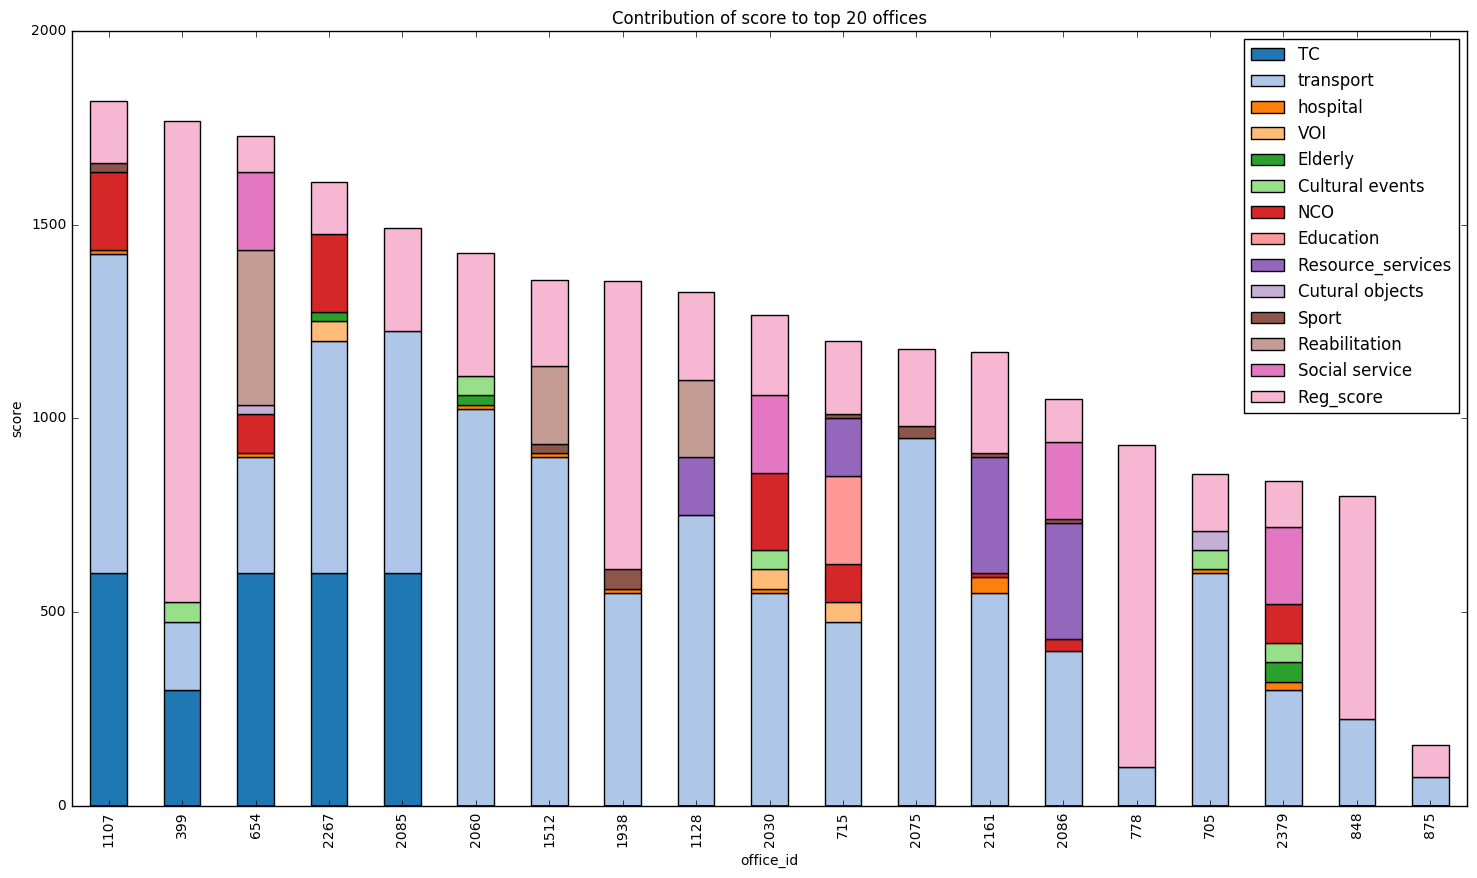

In [152]:
contribution.sort_values('total', ascending=0)[[x for x in contribution.columns if x != 'total']].plot(kind='bar', color=Tableau_20.mpl_colors
, stacked=1, figsize=(18,10))
plt.ylabel('score')
plt.title('Contribution of score to top 20 offices')

## Test Matching with SB results